In [2]:
import matplotlib.pyplot as plt
from datasets import load_dataset
import transformers
import tokenizers

plt.style.use('ggplot')

/home/kaspar/Documents/git/huggingface/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## The Dataset

docs" https://huggingface.co/docs/datasets/load_hub

In [3]:
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/home/kaspar/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)
100%|██████████| 3/3 [00:00<00:00, 1101.54it/s]


In [4]:
emotions.set_format(type='pandas')

In [5]:
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [6]:
def label_int2string(i):
    return emotions['train'].features['label'].int2str(i)

df['label_name'] = df.label.apply(label_int2string)
df['n_words'] = df.text.apply(lambda x: len(x.split()) )
df.head()

,text,label,label_name,n_words
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


<Axes: ylabel='label_name'>

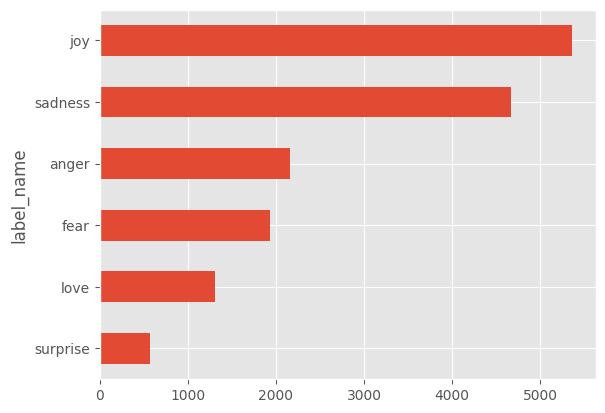

In [7]:
(
    df
    .label_name
    .value_counts(ascending=True)
    .plot(kind='barh')
)

<Axes: title={'center': 'n_words'}, xlabel='label_name'>

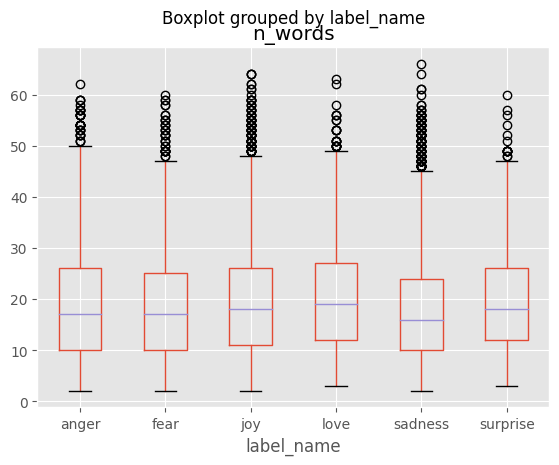

In [8]:
(
    df
    .boxplot('n_words', by='label_name')
)

In [9]:
emotions.set_format()
emotions['train'][:].keys()

dict_keys(['text', 'label'])